# Загрузка и общая информация о данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем название колонок к стандартному виду

In [4]:
data.columns = data.columns.str.lower()
data.columns # названия колонок приведены к нижнему регистру

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Рассчитаем общий объём продаж по каждой игре во всех регионах (Северная Америка, Европа, Япония, другие регионы)

In [5]:
data['sales_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Проверим пропущенные значения

In [6]:
data.isna().sum() # кол-во пропущенных значений

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
sales_sum             0
dtype: int64

In [7]:
data.isna().mean()*100 # проверим процент пропущенных пропусков в столбцах

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
sales_sum           0.000000
dtype: float64

Для двух игр пропущено название и жанр, проверим, что это за строки.

Название и жанр пропущено в одинаковых строках. Речь об играх 1993 года, название может быть не просто восстановить.
Удалим данные строки

In [8]:
data[data['name'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [9]:
data = data.dropna(subset = ['genre']) 
data[data['genre'].isna()] # строки удалены

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum


Количество пропусков по году выпуска игры - 269 строк. 

Предлагаю удалить все игры, в которых и пропущен год, и значение рейтинга, поскольку без этих данных сложно сделать анализ

In [10]:
without_year = data[(data['year_of_release'].isna()) & ((data['critic_score'].isna()) | ((data['user_score'].isna()) | ((data['rating'].isna()))))]
without_year # получили 122 строки по заданному критерию, удалим их

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN,1.46
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN,1.30
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+,0.01
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [11]:
# удалим строки, в которых пропущен и год, и один из рейтингов
data = data.drop(index = without_year.index, axis=0).reset_index()
data[(data['year_of_release'].isna()) & ((data['critic_score'].isna()) | ((data['user_score'].isna()) | ((data['rating'].isna()))))]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum


In [12]:
data.isna().sum()

index                 0
name                  0
platform              0
year_of_release     147
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
sales_sum             0
dtype: int64

Осталось 147 строк, в которых не указан год

Некоторые названия игр в списке повторяются, поскольку выходили на разных платформах, проверим, сколько таких строк

In [13]:
data['name'].value_counts().head(20) 

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
Ratatouille                                 9
FIFA 14                                     9
Cars                                        8
FIFA 15                                     8
Angry Birds Star Wars                       8
Lego Batman 3: Beyond Gotham                8
Terraria                                    8
LEGO Star Wars II: The Original Trilogy     8
FIFA Soccer 13                              8
Monopoly                                    8
Madden NFL 08                               8
LEGO The Hobbit                             8
LEGO Jurassic World                         8
The LEGO Movie Videogame                    8
FIFA Soccer 11                              7
LEGO Batman 2: DC Super Heroes              7
Pro Evolution Soccer 2012                   7
Name: name, dtype: int64

In [14]:
data[data['name'] == 'Need for Speed: Most Wanted']

# мы видим, что название игры повторяется на разных платформах и с разными годами выпуска.

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
253,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
522,523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
1187,1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1585,1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1992,1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2041,2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,1.01
3568,3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5947,5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6245,6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,0.27
6381,6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


Посмотрим на количество игр с совокупной прибылью менее 100 000 долларов и менее 600 тыс.долларов.

В данных достаточно строк с низкими продажами. 

Предлагаю удалить игры с продажами ниже 600 000 долларов и без года выпуска, поскольку не сможем полноценно использовать их в анализе. И их общий вклад в результат скорее не является критичным

In [15]:
print(len(data[data['sales_sum'] < 0.2]))
print(len(data[data['sales_sum'] < 0.6])) # почти половина игр (8973) принесли совокупно не более 200 тыс. долларов
# считаю возможным удалить игры с не высокой общей доходностью и отсутствием года

8973
13224


In [16]:
data[(data['year_of_release'].isna()) & (data['sales_sum'] < 0.6)]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
3400,3413,Madden NFL 06,X360,NaN,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E,0.58
3446,3459,NASCAR: Dirt to Daytona,PS2,NaN,Racing,0.28,0.22,0.00,0.07,84.0,8.8,E,0.57
3473,3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,0.58
3691,3704,Def Jam: Fight for NY,XB,NaN,Fighting,0.43,0.10,0.00,0.02,84.0,8.5,M,0.55
3726,3739,NBA Street Vol. 2,GC,NaN,Sports,0.41,0.11,0.00,0.01,88.0,8.1,E,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16158,16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,0.01
16250,16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16282,16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16325,16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01


Удадим все игры с совокупным доходом менее 600 000 долларов и пропущенным годом выпуска.
Для оставшихся строк найдём в интернете годы выпуска игры - на основани названия игры и платформы, на которой она вышла

In [17]:
data = data.drop(index = data[(data['year_of_release'].isna()) & (data['sales_sum'] < 0.6)].index, axis=0)
data[(data['year_of_release'].isna()) & (data['sales_sum'] < 0.6)]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum


In [18]:
name_year_missed = data[data['year_of_release'].isna()]['name'].to_list()
print(name_year_missed)

['Madden NFL 2004', 'FIFA Soccer 2004', 'LEGO Batman: The Videogame', 'Rock Band', "Frogger's Adventures: Temple of the Frog", 'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3', 'Rock Band', 'Call of Duty: Black Ops', 'Rock Band', 'LEGO Batman: The Videogame', 'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003', 'Hitman 2: Silent Assassin', 'Rock Band', 'Legacy of Kain: Soul Reaver', 'Suikoden III', 'LEGO Harry Potter: Years 5-7', 'Yakuza 4', 'LEGO Harry Potter: Years 5-7', 'Namco Museum', 'The Lord of the Rings: War in the North', 'Madden NFL 07', 'MLB SlugFest 20-03', 'The Lord of the Rings: War in the North', 'Shaun White Snowboarding', 'Madden NFL 11', 'Test Drive Unlimited 2', 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe', 'LEGO Harry Potter: Years 5-7', 'Metal Gear Solid 2: Substance', 'Test Drive Unlimited 2', 'Advance Wars: Days of Ruin', 'The Golden Compass']


Сделаю словарь на основе полученного списка игр, игры в списке повторяются, одна и та же игра на разных платформах выходила в один год(проверяла). Заполним оставшиеся пропуски в столбце с годом выпуска

In [19]:
name_year = {'Madden NFL 2004' : 2003, 'FIFA Soccer 2004' : 2003, 'LEGO Batman: The Videogame' : 2008, 'Rock Band':  2007, 
             'Frogger\'s Adventures: Temple of the Frog': 2001, 'LEGO Indiana Jones: The Original Adventures' : 2008,  
            'Call of Duty 3': 2006, 'Call of Duty: Black Ops' : 2010, 'LEGO Harry Potter: Years 5-7' : 2012,
            'NASCAR Thunder 2003' : 2003, 'Hitman 2: Silent Assassin' : 2002, 'Legacy of Kain: Soul Reaver': 1999, 
             'Suikoden III': 2002, 'Yakuza 4': 2010, 'Namco Museum': 2001, 'The Lord of the Rings: War in the North': 2011,
             'Madden NFL 07': 2006, 'Shaun White Snowboarding': 2008, 'MLB SlugFest 20-03': 2002, 'Madden NFL 11': 2010,
            'Test Drive Unlimited 2': 2011, 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe': 2005, 
             'Metal Gear Solid 2: Substance': 2002, 'Advance Wars: Days of Ruin': 2008, 'The Golden Compass': 2007}

In [20]:
data['year_of_release'] = data['year_of_release'].fillna(data.name.map(name_year)) 
# заполнили оставшиеся 34 пропуска в годе игры

In [21]:
data.isna().sum()

index                 0
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
sales_sum             0
dtype: int64

Пропуски остались только в переменных о рейтинге игры, рассмотрим пропуски подробнее

In [22]:
# количество строк для которых не определен ни один рейтинг
len(data[data['critic_score'].isna() & data['user_score'].isna() & data['rating'].isna()])

6534

В базе 6534 игры, для которых не определен ни один рейтинг. Далее приведен разброс по годам, жанрам и платформам.      

Мы видим, что пропуски рейтинга есть для игр разного периода, для разных платформ и разных жанров. Поэтому считаю, что не стоит удалять эти данные из базы или заменять средним / медианным рейтингом для платформы /года/жанра, поскольку рейтинг каждой игры мало связан с рейтингами других игр, если какие-то другие игры на платформе получили высокий рейтинг, не означает, что эта игра тоже.


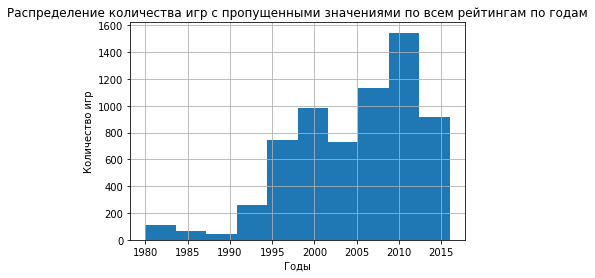

In [23]:
data[data['critic_score'].isna() & data['user_score'].isna() & data['rating'].isna()]['year_of_release'].hist()

plt.title('Распределение количества игр с пропущенными значениями по всем рейтингам по годам')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

In [24]:
data[data['critic_score'].isna() & data['user_score'].isna() & data['rating'].isna()]['platform'].value_counts()

PS      980
DS      848
PS2     669
PSP     655
PS3     356
N64     316
Wii     304
GBA     297
3DS     285
PSV     278
SNES    239
X360    195
SAT     173
PC      142
PS4     125
2600    116
NES      98
GB       97
XB       85
GC       85
XOne     53
WiiU     42
DC       38
GEN      27
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: platform, dtype: int64

In [25]:
data[data['critic_score'].isna() & data['user_score'].isna() & data['rating'].isna()]['genre'].value_counts()

Action          1131
Misc             847
Adventure        827
Sports           810
Role-Playing     708
Fighting         403
Racing           359
Strategy         328
Platform         317
Shooter          295
Simulation       281
Puzzle           228
Name: genre, dtype: int64

Cтолбец `user_score` содержит текстовое значение 'tbd' и функция astype() для перевода в числовой тип данных не сработает. Поскольку tbd означает "To Be Determined" - оценка будет определена позже. Смысл данных близок к NAN, поэтому воспользуемся функцией to_numeric, которая преобразует текстовые значения tbd в NaN

In [26]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce');

In [27]:
data[data['user_score'] == 'tbd']; # нет пропусков

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16478 entries, 0 to 16590
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16478 non-null  int64  
 1   name             16478 non-null  object 
 2   platform         16478 non-null  object 
 3   year_of_release  16478 non-null  float64
 4   genre            16478 non-null  object 
 5   na_sales         16478 non-null  float64
 6   eu_sales         16478 non-null  float64
 7   jp_sales         16478 non-null  float64
 8   other_sales      16478 non-null  float64
 9   critic_score     8017 non-null   float64
 10  user_score       7494 non-null   float64
 11  rating           9802 non-null   object 
 12  sales_sum        16478 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


# Исследовательский анализ данных

__Сколько игр выпускалось за разные годы?__

In [29]:
game_in_year = data.groupby(by=['year_of_release'])['genre'].count().reset_index()
game_in_year_sales = data.groupby(by=['year_of_release'])['sales_sum'].sum().reset_index()

game_in_year.columns = ['year', 'game_per_year']
game_in_year_sales.columns = ['year', 'sales_per_year']

print(game_in_year.head(3))
print(game_in_year_sales.head(3))

     year  game_per_year
0  1980.0              9
1  1981.0             46
2  1982.0             36
     year  sales_per_year
0  1980.0           11.38
1  1981.0           35.68
2  1982.0           28.88


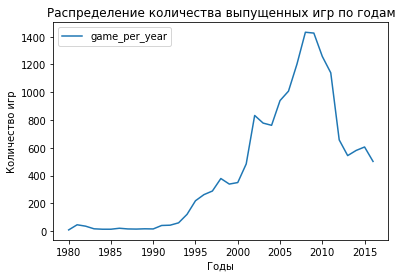

In [30]:
game_in_year.plot(x='year', y='game_per_year' )

plt.title('Распределение количества выпущенных игр по годам')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.legend()
plt.show()

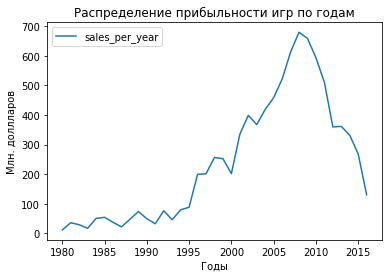

In [31]:
game_in_year_sales.plot(x='year', y='sales_per_year' )

plt.title('Распределение прибыльности игр по годам')
plt.xlabel('Годы')
plt.ylabel('Млн. доллларов')
plt.legend()
plt.show()

__Комментарий:__
    
На графиках мы видим, что критически малое значение игр выпускалось до 1995 года, а после 2000 начался резкий рост.   
На мой взгляд, можно считать что малое количество игр выпускались до 2000 года.

Пик по количеству выпущенных игр и объему продаж наблюдался около 2007 года, далее резкое снижение и количества игр и прибыли от продаж. Некоторое плато в падении было достигнуто около 2012 или 2013 года. Далее падение продолжилось

Предлагаю далее анализировать продажи платформ, которые выпускали игры с 2013 года


**Анализ изменения продаж по платформам**

Задачи: 
1. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. 
2. Определить за какой характерный срок появляются новые и исчезают старые платформы.

In [32]:
platform_sales_total = data.groupby(by=['platform'])['sales_sum'].sum().reset_index().sort_values(by='sales_sum', ascending=False)
platform_sales_total

,platform,sales_sum
16,PS2,1246.46
28,X360,967.01
17,PS3,936.28
26,Wii,903.46
4,DS,804.04
15,PS,728.63
6,GBA,315.95
18,PS4,314.14
19,PSP,291.65
2,3DS,257.81


In [33]:
platform_sales_total_more_300 = platform_sales_total.query('sales_sum > 300')
platform_sales_total_more_300 = platform_sales_total_more_300['platform'].unique()
platform_sales_total_more_300
# для определения периода популярности выберем платформы с наибольшим суммарным доходом

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4'],
      dtype=object)

In [34]:
data_platform_sales_total_more_300= data.query('platform in @platform_sales_total_more_300')
data_platform_sales_total_more_300.head(2)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


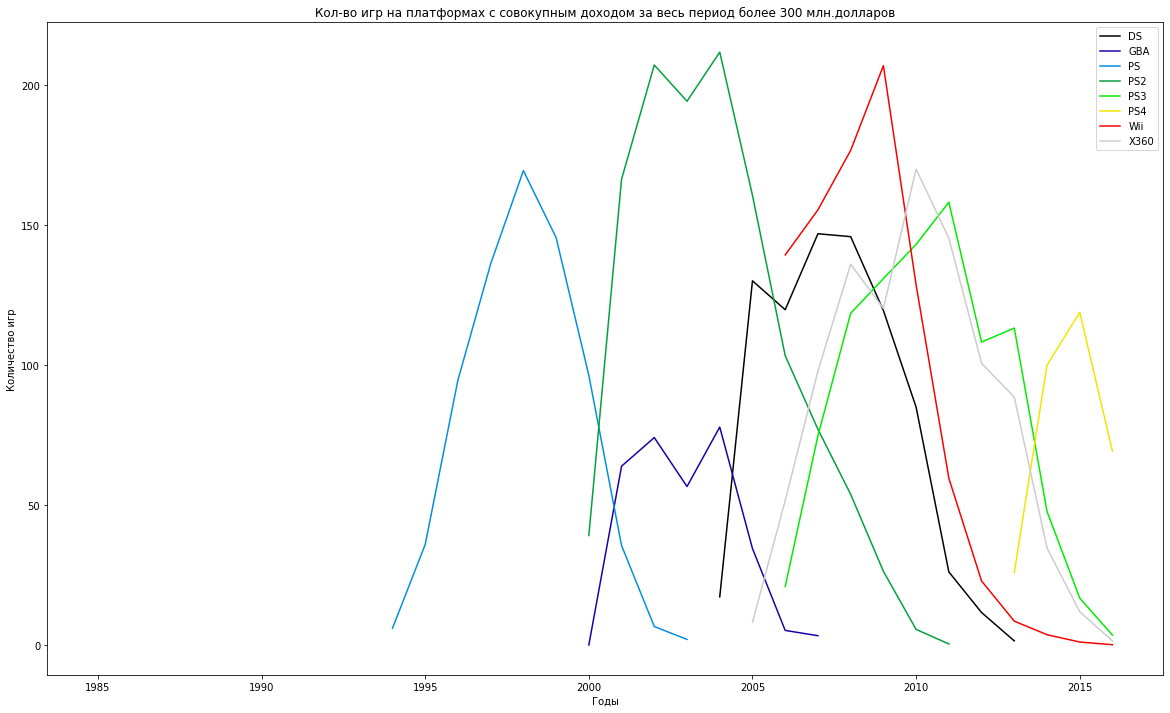

In [35]:
data_platform_sales_total_more_300.pivot_table(index='year_of_release', columns ='platform' ,values='sales_sum', aggfunc='sum'
                                      ).plot(figsize = (20, 12), colormap='nipy_spectral');

plt.title('Кол-во игр на платформах с совокупным доходом за весь период более 300 млн.долларов')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.legend()
plt.show()

Мы видим, что платформы с наибольшими доходами существуют в промежутке до 7 до 10 лет. Важно отметить, что в список платформ с суммарными доходом больше 300 млн.долларов попала только одна платформа с доходами больше 50 млн. долларов в 2013-2016 годах.

Вероятно, что новые платформы, которые появились относительно недавно могли ещё не собрать достаточно прибыли для того, чтобы отобразиться в текущем рейтинге.

Рассмотрим платформы, у которых есть продажи игр в периоде после 2013 года. Поскольку на предыдущем графике в 2013 году наблюдалась точка изменения тренда

Выберем все платформы, на которых игры выходили после 2013 года. Сначала соберем сводную таблицу по доходности каждой платформы по каждому году, в котором на ней выходили игры. Далее выберем платформы, на которых игры выходили в 2013 году и позже

In [36]:
# все платформы, на которых выходили игры в после 2013 года
platform_year_data = data.pivot_table(index=['year_of_release', 'platform'], values='sales_sum', aggfunc='sum').reset_index().sort_values(
    by=['year_of_release', 'platform'])

platform_after_2013 = data.query('year_of_release > 2013')['platform'].unique()
platform_after_2013


array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Выберем из всего объёма данных те платформы, которые есть в списке `platform_after_2013`.   
Далее отберем данные за 2015 год и отсортируем по объёму продаж в 2015 году для построения графиков. Обновим список платформ в соответствии с уровнем продаж в 2015 году - в начале платформы с наибольшим объёмом продаж в 2015 году.

2015 год выбран как последний год, по которым в данных есть полные данные

In [37]:
platform_exists_after_2013 = data.query('platform in @platform_after_2013')
platform_after_2013_sorted = platform_exists_after_2013.query('year_of_release == 2015').groupby(by='platform')['sales_sum'].sum().sort_values(ascending=False).reset_index()['platform']
platform_after_2013_sorted = platform_after_2013_sorted.to_list()
platform_after_2013_sorted

['PS4', 'XOne', '3DS', 'PS3', 'WiiU', 'X360', 'PC', 'PSV', 'Wii', 'PSP']

Построим общий график по платформам, которые выпускали игры после 2013 года.

На всех платформах продолжается падение доходов от продаж.    

Наибольшие доходы в период 2013 - 2016 наблюдаются для платформ:
- PS4
- XOne
- 3DS

Резкое падение наблюдается для платформы `PS3`с 2015 на 2016 год. Возможно, сказывается не полнота данных за 2016 год.
Посмотрим на графике динамику объёма продаж на платформах более подробно.

На основании анализа графиков возникает вопрос о платформе PC. Поскольку в 2015 году доход не нулевой.   

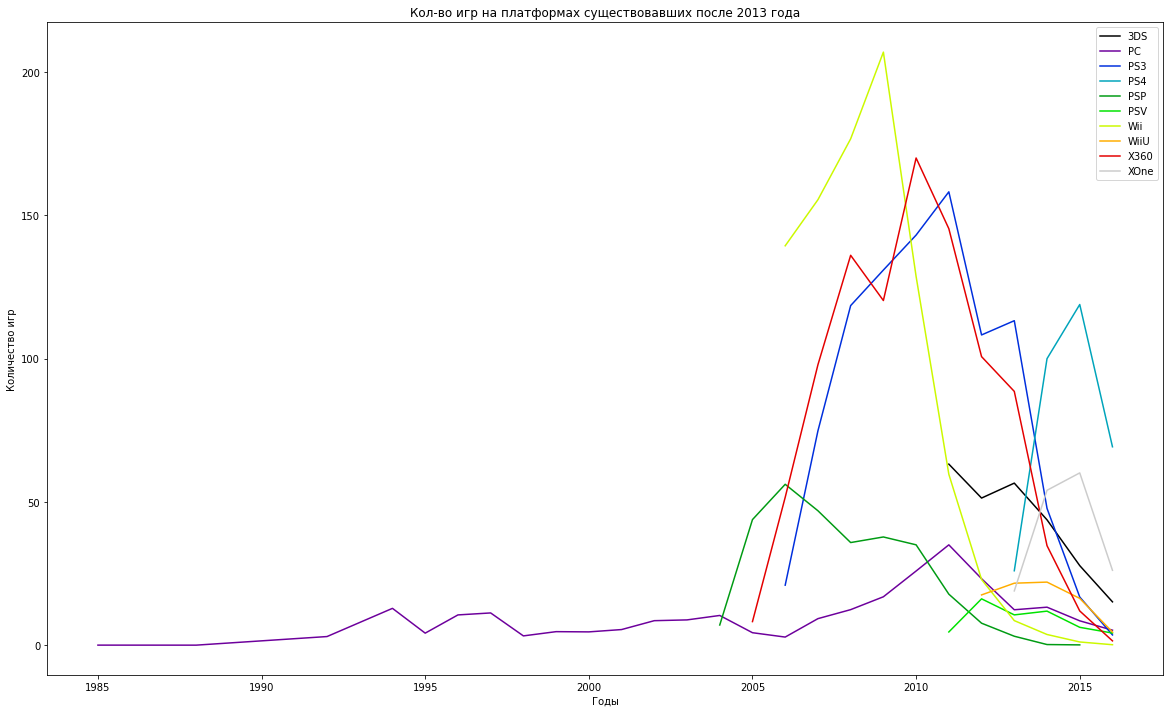

In [38]:
platform_exists_after_2013.pivot_table(index='year_of_release', columns ='platform' ,values='sales_sum', aggfunc='sum'
                                      ).plot(figsize = (20, 12), colormap='nipy_spectral');

plt.title('Кол-во игр на платформах существовавших после 2013 года')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.legend()
plt.show()

__Платформы для дальнейшего анализа за период 2013 - 2016:__

- PS4
- XOne
- 3DS
- PS3 (на осовании данных 2015 года)

По этим платформам наблюдается падение дохода от продаж при сравнении год к году

In [39]:
platform_short_list = ['PS4', 'XOne', '3DS', 'PS3']
data_short = data.query('platform in @platform_short_list & year_of_release >=2013')
data_short['platform'].value_counts() # сохранили данные для анализа в отдельную переменную
# Количество игр на платформах за 2013-2016 годы

PS4     392
PS3     345
3DS     303
XOne    247
Name: platform, dtype: int64

In [40]:
data

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16587,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16588,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16589,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [41]:
#удаляем колонки индексов, полученые ранее
data = data.drop(columns = ['index'], axis = 1)
data_short = data_short.drop(columns = ['index'], axis = 1)

In [42]:
data_short[data_short['platform'] == 'PS3']['sales_sum'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: sales_sum, dtype: float64

In [43]:
data_short[data_short['platform'] == '3DS']['sales_sum'].describe()

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: sales_sum, dtype: float64

In [44]:
data_short[data_short['platform'] == 'PS4']['sales_sum'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sales_sum, dtype: float64

In [45]:
data_short[data_short['platform'] == 'XOne']['sales_sum'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sales_sum, dtype: float64

In [46]:
for col in ['critic_score', 'user_score', 'rating']:
    print(col, data_short[col].isna().sum())
print(len(data_short))

critic_score 674
user_score 582
rating 542
1287


Создадим датасет за период 2013-2014 год без пропусков с рейтингами data_short_without_na

In [47]:
data_short_without_na = data_short.dropna(axis=0) # удалим все строки с NaN

In [48]:
for col in ['critic_score', 'user_score', 'rating']:
    print(col, data_short_without_na[col].isna().sum())
print(len(data_short))
# в столбцах 'critic_score', 'user_score', 'rating' - пропущенные данные отсутствуют


critic_score 0
user_score 0
rating 0
1287


In [49]:
data_short_without_na.info() # После удаления строк с NaN  осталось  игры

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 16 to 16506
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             583 non-null    object 
 1   platform         583 non-null    object 
 2   year_of_release  583 non-null    float64
 3   genre            583 non-null    object 
 4   na_sales         583 non-null    float64
 5   eu_sales         583 non-null    float64
 6   jp_sales         583 non-null    float64
 7   other_sales      583 non-null    float64
 8   critic_score     583 non-null    float64
 9   user_score       583 non-null    float64
 10  rating           583 non-null    object 
 11  sales_sum        583 non-null    float64
dtypes: float64(8), object(4)
memory usage: 59.2+ KB


# Анализ трендов платформ и жанров

__Комментарии:__

- Наибольшее среднее по продажам наблюдается для платформы PS4
- Максимальный доход - для платформы PS3 (наибольший выброс)
- Из 1287 строк для каждого рейтинга более 500 пропущенных значений

__График "ящик с усами" по глобальным продажам игр в разбивке по четырем платформам__

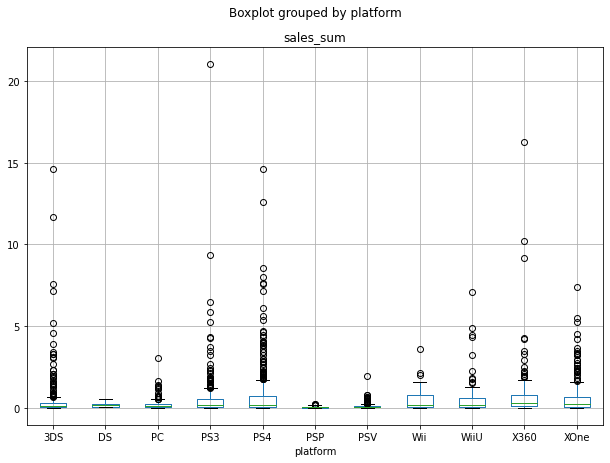

In [50]:
data[data['year_of_release']>=2013].boxplot(column='sales_sum', by='platform', figsize=(10, 7));

# Новый график по все платформам, для которых есть данные за 2013 год и далее

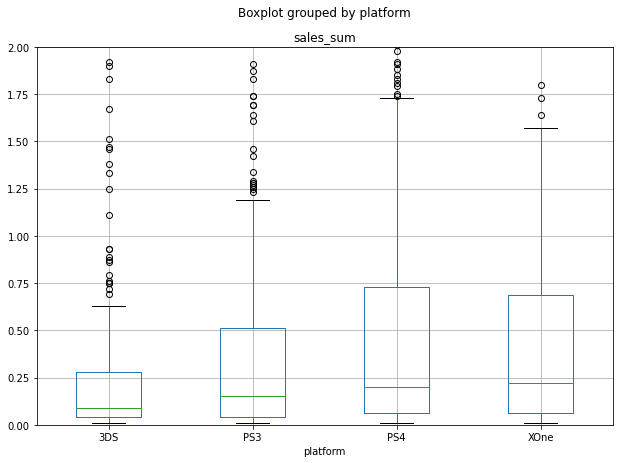

In [51]:
data_short.boxplot(column='sales_sum', by='platform', figsize=(10, 7)).set_ylim(0, 2);
# Новый график по четырем платформам, для которых есть данные за 2013 год и далее

Медиана продаж по играм на платформе располагается около нуля. При этом на каждой платформе есть выбросы - игры, которые обеспечивают существенно больший доход, чем остальные.

Фактически платформы интересны в-первую очередь количеством игр с более высокими доходами - то есть количеством выбросов.

Предлагаю далее включить в анализ примеры игр для каждой платформы, которые являются выбросами и существенно превосходят ожидаемые значения

### Взаимосвязь рейтингов и продаж для наиболее популярных платформ в период с 2013 по 2016 годы

__Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?__

Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [52]:
print('Взаимосвязь рейтингов с продажами для платформы PS4')
print('Взаимосвязь рейтинга пользователей и продаж', data_short_without_na.query('platform == "PS4"')['sales_sum'].corr(data_short_without_na.query('platform == "PS4"')['user_score']))
print('Взаимосвязь рейтинга критиков и продаж', data_short_without_na.query('platform == "PS4"')['sales_sum'].corr(data_short_without_na.query('platform == "PS4"')['critic_score']))

Взаимосвязь рейтингов с продажами для платформы PS4
Взаимосвязь рейтинга пользователей и продаж -0.03088781296873357
Взаимосвязь рейтинга критиков и продаж 0.40357291073577817


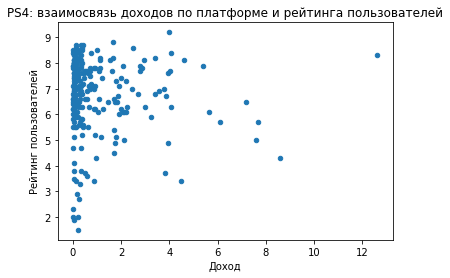

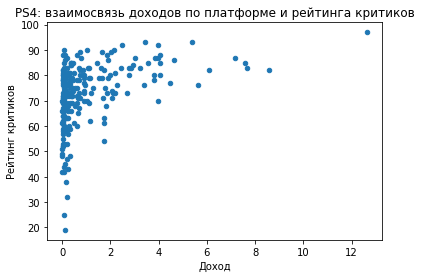

In [53]:
data_short_without_na.query('platform == "PS4"').plot.scatter(x='sales_sum', y='user_score')

plt.title('PS4: взаимосвязь доходов по платформе и рейтинга пользователей')
plt.xlabel('Доход')
plt.ylabel('Рейтинг пользователей')
plt.show()

data_short_without_na.query('platform == "PS4"').plot.scatter(x='sales_sum', y='critic_score') 

plt.title('PS4: взаимосвязь доходов по платформе и рейтинга критиков')
plt.xlabel('Доход')
plt.ylabel('Рейтинг критиков')
plt.show()

In [54]:
print('Взаимосвязь рейтингов с продажами для платформы XOne')
print('Корреляция рейтинга пользователя и продаж не определена, поскольку рейтинг для 161 игры на платформе XOne равен нулю = ', data_short_without_na.query('platform == "XOne"')['sales_sum'].corr(data_short_without_na.query('platform == "XOne"')['user_score']))
print()

print('Взаимосвязь рейтинга критиков и продаж', data_short_without_na.query('platform == "XOne"')['sales_sum'].corr(data_short_without_na.query('platform == "XOne"')['critic_score']))

Взаимосвязь рейтингов с продажами для платформы XOne
Корреляция рейтинга пользователя и продаж не определена, поскольку рейтинг для 161 игры на платформе XOne равен нулю =  -0.07591595053938044

Взаимосвязь рейтинга критиков и продаж 0.409929586886011


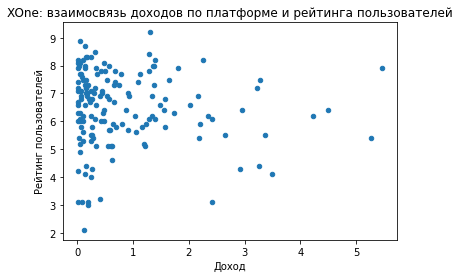

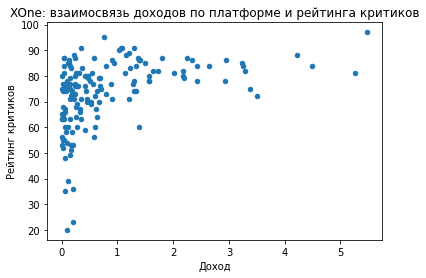

In [55]:
data_short_without_na.query('platform == "XOne"').plot.scatter(x='sales_sum', y='user_score') 

plt.title('XOne: взаимосвязь доходов по платформе и рейтинга пользователей')
plt.xlabel('Доход')
plt.ylabel('Рейтинг пользователей')
plt.show()

data_short_without_na.query('platform == "XOne"').plot.scatter(x='sales_sum', y='critic_score') 

plt.title('XOne: взаимосвязь доходов по платформе и рейтинга критиков')
plt.xlabel('Доход')
plt.ylabel('Рейтинг критиков')
plt.show()

In [56]:
print('Взаимосвязь рейтингов с продажами для платформы 3DS')
print('Взаимосвязь рейтинга пользователей и продаж', data_short_without_na.query('platform == "3DS"')['sales_sum'].corr(data_short_without_na.query('platform == "3DS"')['user_score']))
print('Взаимосвязь рейтинга критиков и продаж', data_short_without_na.query('platform == "3DS"')['sales_sum'].corr(data_short_without_na.query('platform == "3DS"')['critic_score']))

Взаимосвязь рейтингов с продажами для платформы 3DS
Взаимосвязь рейтинга пользователей и продаж 0.2729904366942444
Взаимосвязь рейтинга критиков и продаж 0.33923492878531464


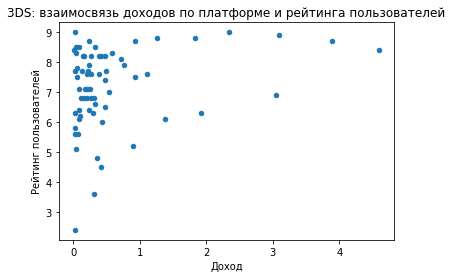

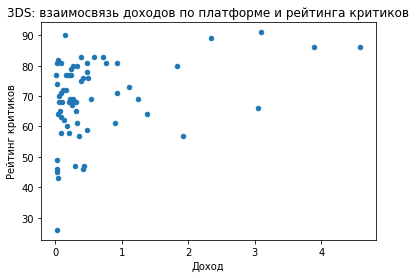

In [57]:
data_short_without_na.query('platform == "3DS"').plot.scatter(x='sales_sum', y='user_score') 

plt.title('3DS: взаимосвязь доходов по платформе и рейтинга пользователей')
plt.xlabel('Доход')
plt.ylabel('Рейтинг пользователей')
plt.show()

data_short_without_na.query('platform == "3DS"').plot.scatter(x='sales_sum', y='critic_score') 

plt.title('3DS: взаимосвязь доходов по платформе и рейтинга критиков')
plt.xlabel('Доход')
plt.ylabel('Рейтинг критиков')
plt.show()

In [58]:
print('Взаимосвязь рейтингов с продажами для платформы PS3')
print('Взаимосвязь рейтинга пользователей и продаж', data_short_without_na.query('platform == "PS3"')['sales_sum'].corr(data_short_without_na.query('platform == "PS3"')['user_score']))
print('Взаимосвязь рейтинга критиков и продаж', data_short_without_na.query('platform == "PS3"')['sales_sum'].corr(data_short_without_na.query('platform == "PS3"')['critic_score']))

Взаимосвязь рейтингов с продажами для платформы PS3
Взаимосвязь рейтинга пользователей и продаж 0.02627973401765724
Взаимосвязь рейтинга критиков и продаж 0.33415621903127235


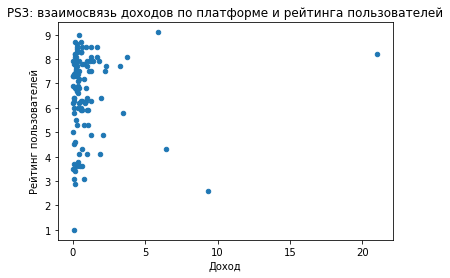

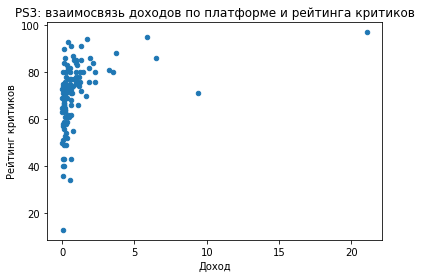

In [59]:
data_short_without_na.query('platform == "PS3"').plot.scatter(x='sales_sum', y='user_score') 

plt.title('PS3: взаимосвязь доходов по платформе и рейтинга пользователей')
plt.xlabel('Доход')
plt.ylabel('Рейтинг пользователей')
plt.show()

data_short_without_na.query('platform == "PS3"').plot.scatter(x='sales_sum', y='critic_score')

plt.title('PS3: взаимосвязь доходов по платформе и рейтинга критиков')
plt.xlabel('Доход')
plt.ylabel('Рейтинг критиков')
plt.show()

__Выводы:__

Рассмотрена взаимосвязь общего дохода и рейтингов пользователей и критиков.
По четырем платформам в период с 2013 по 2016 год наблюдается прямая средней силы взаимосвязь с рейтингом критиков и близкая к нулю взаимосвязь с рейтингом пользователей.

Таким образом, при определении рекламной кампании важнее опираться на рейтинг критиков. Также важно отметить, что уровень взаимосвязи рейтинга критиков сопоставим на 4 платформах.

Также вероятно, что пользователи выбирают игры на основании рейтинга критиков, а оценки пользователей выставляются не системно и уже после покупки и прохождения игры. Оценки пользоваталей могут быть неполными, поскольку не все купленные игры проходятся сразу или до конца, не все готовы выставлять рейтинг.   
Выставлять ретинг могут, например, только наименее довольные / недовльные игроки, чтобы подчеркнуть отношение или получать "правильные" рекомендации с учётом интересов.

### Распределение игр по жанрам и доходности игр

In [60]:
data_short.pivot_table(index='platform', columns ='genre', values='sales_sum')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
3DS,0.293448,0.123333,1.172857,0.221875,0.586000,0.192222,NaN,1.086613,0.060000,0.635333,0.227500,0.115455
PS3,0.622105,0.148966,0.252083,0.464444,0.370000,0.040000,0.496923,0.336531,1.025484,0.118333,0.688298,0.152500
PS4,0.667361,0.226429,0.480556,0.409500,0.640833,0.020000,0.638947,0.568431,2.160000,0.205000,1.208913,0.103333
XOne,0.438941,0.191429,0.350000,0.391053,0.186000,NaN,0.489500,0.753571,1.587632,0.172500,0.703684,0.140000


In [61]:
data_short.pivot_table(index ='genre', values='sales_sum').sort_values(by = 'sales_sum', ascending=False)
# средняя доходность по жанрам

,sales_sum
genre,
Shooter,1.628288
Sports,0.838273
Role-Playing,0.701136
Racing,0.545962
Action,0.519325
Platform,0.505854
Fighting,0.452857
Simulation,0.392258
Misc,0.349213


Жанры с наибольшими продажами:
 - Shooter
 - Sports
 - Role-Playing


Наиболее доходные жанры внутри каждой платформы, с учетом распределение доходов по жанру:

- **3DS** - `Fighting (1.172857)`, Platform (0.586000), `Role-Playing(1.086613)`
- **PS3** - Action (0.622105), Shooter (1.025484), Sports(0.688298), `Strategy (0.152500)`
- **PS4** - Action (0.667361), `Platform (0.640833)`, Racing(0.638947), `Shooter(2.160000)`, `Sports (1.208913)`
- **XOne** - Role-Playing (0.753571), `Shooter(1.587632)`, Sports (0.703684), Strategy (0.140000)
  
Серым фоном выделены жанры, которые показывают наибольший доход среди четырех платформ в исследуемый период.


Таким образом, при планировании рекламной кампании приоритетно оценивать соответствующие жанры на платформах и следить за рейтингами критиков по играм в этих жанрах. При этом возможна ситуация, когда платформа занимает не лидирующее место по продажам в жанре, но игры данного жанра продаются с более высокой доходностью, чем игры других жанров.


Для определения игр, на которые следует сделать ставку в следущем году может быть полезен следующий подход:   

- На платформах отслеживаются новинки в жанрах, которые на этой платформе приносят большие продажи
- По играм анализируются рейтинги критиков и выбираются наиболее потенциальные
- Наибольшее внимание рекомендуется уделить жанрам Shooter, Sports, Role-Playing, Racing, Action, Platform


# Составлен портрет пользователя каждого региона (NA, EU, JP)

In [62]:
# создадим датасет со всеми платформами по регионам, чтобы определить топ-5 наиболее популярных в каждом
data_region = data.query('year_of_release >=2013')
data_region['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

__Наиболее популярная платформа в регионе__

In [63]:
data_region.pivot_table(index ='platform', values='na_sales').sort_values(by = 'na_sales', ascending=False)

,na_sales
platform,
X360,0.439032
XOne,0.377004
Wii,0.285217
PS4,0.277398
WiiU,0.254000
PS3,0.184058
3DS,0.126073
DS,0.071250
PC,0.058783


In [64]:
data_region.pivot_table(index ='platform', values='eu_sales').sort_values(by = 'eu_sales', ascending=False)

,eu_sales
platform,
PS4,0.359923
Wii,0.257826
X360,0.228602
XOne,0.208866
PS3,0.196551
WiiU,0.172609
PC,0.134180
DS,0.106250
3DS,0.102178


In [65]:
data_region.pivot_table(index ='platform', values='jp_sales').sort_values(by = 'jp_sales', ascending=False)

,jp_sales
platform,
3DS,0.223795
WiiU,0.094609
PS3,0.067681
PSV,0.051927
PSP,0.049104
PS4,0.040714
X360,0.002742
Wii,0.002174
XOne,0.001377


В Северной Америке наиболее популярными с точки зрения объёмов продаж являются:
- X360 (данная платформа не была включена в анализ перспективных платформ, хотя в 2013-2014 году показывала достаточно высокие продажи. Наибольшие средние продажи результат более высоких показателей в 2013-2014 годах)
- XOne
- Wii

В Европе:
- PS4
- Wii
- X360
- XOne

В Японии:
- 3DS (с большим отрывом от следующих)

Интересно, что в список наиболее популярных платформ за период с 2013 по 2016 год попали платформы, продажи по которым существенно снизились за 2015-2016 год за счет более высоких значениях в 2013 и 2014 году.



__Наиболее популярный жанр в регионе NA, EU, JP__

In [66]:
data_region.pivot_table(index ='genre', values='na_sales').sort_values(by = 'na_sales', ascending=False)

,na_sales
genre,
Shooter,0.586845
Sports,0.305000
Platform,0.245135
Fighting,0.194375
Misc,0.177355
Action,0.164556
Role-Playing,0.158904
Racing,0.152471
Simulation,0.078387


In [67]:
data_region.pivot_table(index ='genre', values='eu_sales').sort_values(by = 'eu_sales', ascending=False)

,eu_sales
genre,
Shooter,0.469840
Sports,0.282804
Racing,0.237529
Platform,0.210541
Simulation,0.176129
Action,0.154217
Misc,0.129290
Role-Playing,0.126610
Fighting,0.106875


In [68]:
data_region.pivot_table(index ='genre', values='jp_sales').sort_values(by = 'jp_sales', ascending=False)

,jp_sales
genre,
Role-Playing,0.174795
Fighting,0.095625
Simulation,0.072903
Puzzle,0.069412
Platform,0.064730
Misc,0.059355
Action,0.052859
Shooter,0.035348
Strategy,0.031607


Рейтинг наиболее популярных жанров ближе между пользователями из Северной Америке и Европы. В Японии рейтинг жанров принципиально отличается.

Для того чтобы точнее объяснить предпочтения по жанрам, на мой взгляд, мне не хватает более точной информации о социально-демографических характеристиках пользователей в регионах. Есть гипотеза, что отличия обусловены тем, что отличаются основные целевые аудитории.

__Проанализируем рейтинг ESRB__

In [69]:
print('Количество строк в данных за 2013-2016 год без удаления NaN', len(data_region))
print('Пропущенные значения в переменной rating ESRB', data_region['rating'].isna().sum()) # для почти половины игр отсутствует рейтинг ESRB

Количество строк в данных за 2013-2016 год без удаления NaN 2233
Пропущенные значения в переменной rating ESRB 977


Заменим информацию об отсутствии рейтинга на "значение-заглушку"

In [70]:
data_region['rating'] = data_region['rating'].fillna('Without_rating')

In [71]:
data_region['rating'].value_counts()

Without_rating    977
M                 369
T                 333
E                 302
E10+              252
Name: rating, dtype: int64

In [72]:
data_region.pivot_table(index ='rating', values='sales_sum', aggfunc='median').sort_values(by = 'sales_sum', ascending=False)

,sales_sum
rating,
M,0.340
E10+,0.275
E,0.175
T,0.150
Without_rating,0.050


In [73]:
data_region.pivot_table(index ='rating', values='sales_sum', aggfunc='mean').sort_values(by = 'sales_sum', ascending=False)

,sales_sum
rating,
M,1.007263
E,0.662781
E10+,0.457897
T,0.380240
Without_rating,0.283357


**Описание категорий:**


«M» - («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.    
«T» - («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.    
«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.   
«E10+» - («Everyone 10 and older») — «Для всех от 10 лет и старше».   


Больше всего средние и медиана по продажам для категории «M» - («Mature») — «Для взрослых».    
Далее- семейные игры - "Для всех" и "Для всех от 10 лет".    
Последнее место по объёму продаж занимают игры с рейтингом "Для продростков"

Разница между медианой и средним говорит о высоком разбросе по продажам в каждой категории.



__Сравним изменение уровня продаж в зависимости от рейтинга ESRB разных регионах__

In [74]:
data_region.pivot_table(index ='rating', values='na_sales', aggfunc='mean').sort_values(by = 'na_sales', ascending=False)

,na_sales
rating,
M,0.447724
E,0.261755
E10+,0.215238
T,0.149520
Without_rating,0.091525


In [75]:
data_region.pivot_table(index ='rating', values='eu_sales', aggfunc='mean').sort_values(by = 'eu_sales', ascending=False)

,eu_sales
rating,
M,0.393821
E,0.276026
E10+,0.169405
T,0.125976
Without_rating,0.080768


In [76]:
data_region.pivot_table(index ='rating', values='jp_sales', aggfunc='mean').sort_values(by = 'jp_sales', ascending=False)

,jp_sales
rating,
Without_rating,0.087052
T,0.061832
E,0.050132
M,0.038238
E10+,0.023373


__Наблюдения по распределению категорий в регионах:__

- В Северной Америке и Европе наибольший  объемом продаж у игр с рейтингом 'Для взрослых'
- В Японии наибольшие продажи среди игр без рейтинга, далее игры с рейтингом "Для подростков".

- Второе место в Северной Америке и Европе, третье в Японии занимают игры с рейтингом "Для всех" (развивающие игры для детей от 6 лет)

Таким образом, при выборе игр для рекламы в Европе и Северной Америке стоит обращать больше внимания на категорию "Для взрослых", в Японии - "Для подростков". Игры "Для всех" могут быть интересны во всех направлениях.

# Статистическая проверка гипотез

### Гипотеза 1

__Нулевая гипотеза:__ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  


__Альтернативная гипотеза:__ Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [77]:
# важно отфильтровать данные с рейтингом tbd - которым было присвоено значение 15
data.query('(platform == "XOne" | platform == "PC") & user_score != 15').pivot_table(index='platform', values = 'user_score', aggfunc='mean')

,user_score
platform,
PC,7.063492
XOne,6.521429


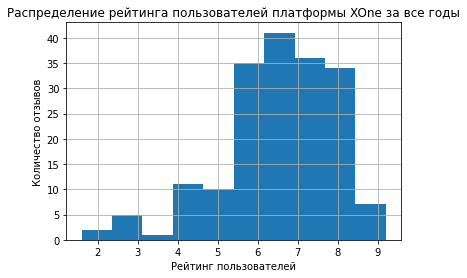

In [78]:
data.query('(platform == "XOne")')['user_score'].hist()

plt.title('Распределение рейтинга пользователей платформы XOne за все годы')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество отзывов')
plt.show()

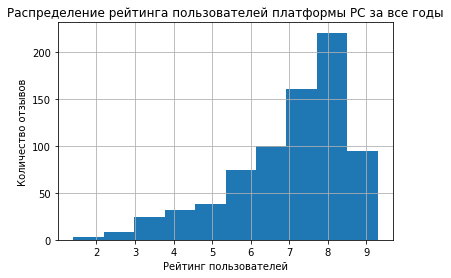

In [79]:
data.query('(platform == "PC")')['user_score'].hist()

plt.title('Распределение рейтинга пользователей платформы PC за все годы')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество отзывов')
plt.show()

In [80]:
# проведем сравнение на исходных данных
alpha = .05

results = st.ttest_ind(
    data.query('platform == "XOne" & user_score !=15')['user_score'].dropna(), 
    data.query('platform == "PC" & user_score !=15')['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.987462409263676e-06
Отвергаем нулевую гипотезу


In [81]:
# проведем сравнение на исходных данных
alpha = .05

results = st.ttest_ind(
    data_short.query('platform == "XOne" & user_score !=15')['user_score'].dropna(), 
    data_short.query('platform == "PC" & user_score !=15')['user_score'].dropna())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


__Комментарий:__




Для проверки статистической гипотезы использовался двусторонний t-test. По результатам недотаточно данных для отвержения нулевой гипотезы о равенстве средних.

Тест проведён на полном наборе данных и данных за 2013-2016 годы. Результат одинаковый

### Гипотеза 2

__Нулевая гипотеза:__ Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны  


__Альтернативная гипотеза:__ Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [82]:
# важно отфильтровать данные с рейтингом tbd - которым было присвоено значение 15
data.query('(genre == "Action" | genre == "Sports") & user_score != 15').pivot_table(index='genre', values = 'user_score', aggfunc='mean')

,user_score
genre,
Action,7.062873
Sports,6.952346


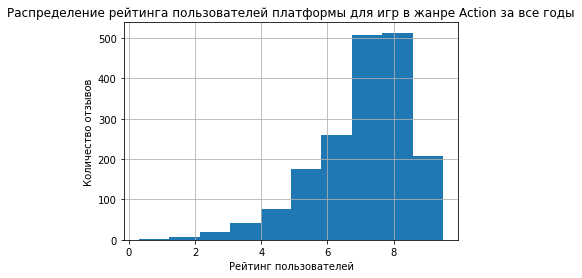

In [83]:
data.query('genre == "Action"')['user_score'].hist()

plt.title('Распределение рейтинга пользователей платформы для игр в жанре Action за все годы')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество отзывов')
plt.show()

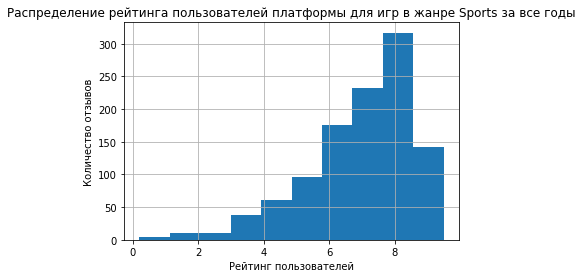

In [84]:
data.query('genre == "Sports"')['user_score'].hist()

plt.title('Распределение рейтинга пользователей платформы для игр в жанре Sports за все годы')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество отзывов')
plt.show()

In [85]:
# проведем сравнение на исходных данных
alpha = .05

results = st.ttest_ind(
    data.query('genre == "Action"')['user_score'].dropna(), 
    data.query('genre == "Sports"')['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.06264935738465702
Не получилось отвергнуть нулевую гипотезу


**Рассмотрим данные за период 2013-2016 года**

In [86]:
data_short.query('(genre == "Action" | genre == "Sports")').pivot_table(index='genre', values = 'user_score', aggfunc='mean')

,user_score
genre,
Action,6.806356
Sports,5.415741


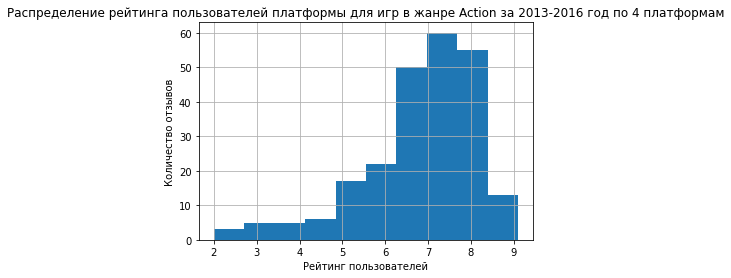

In [87]:
data_short.query('genre == "Action" ')['user_score'].hist()

plt.title('Распределение рейтинга пользователей платформы для игр в жанре Action за 2013-2016 год по 4 платформам')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество отзывов')
plt.show()

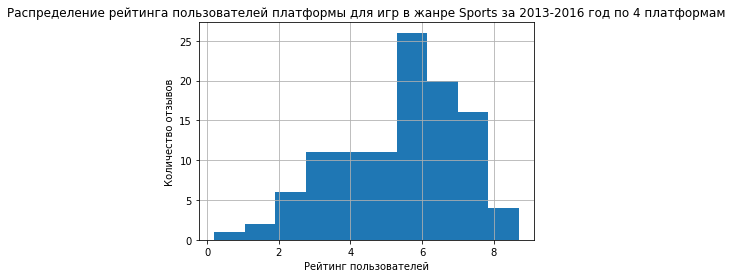

In [88]:
data_short.query(' genre == "Sports" ')['user_score'].hist()

plt.title('Распределение рейтинга пользователей платформы для игр в жанре Sports за 2013-2016 год по 4 платформам')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество отзывов')
plt.show()

In [89]:
 # проведем сравнение на данных за 2013-2016 годы для четырех платформ
alpha = .05

results = st.ttest_ind(
    data_short.query('genre == "Action"')['user_score'].dropna(), 
    data_short.query('genre == "Sports"')['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.776828260423778e-12
Отвергаем нулевую гипотезу


In [90]:
 # проведем сравнение на данных за 2013-2016 годы для всех платформ
alpha = .05

results = st.ttest_ind(
    data[data['year_of_release'] >=2013].query('genre == "Action"')['user_score'].dropna(), 
    data[data['year_of_release'] >=2013].query('genre == "Sports"')['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704318e-20
Отвергаем нулевую гипотезу


__Комментарий:__

Получены разные тенденции для данных за весь период и за 2013-2016 годы по четырем платформам(и всем платформам).

При анализе полного объёма данных за весь период по всем платформам недостаточно информации, чтобы отвергнуть гипотезу, что средние пользовательские рейтинги жанров Action и Sports равны. Считаем, что разница в рейтингах не значима.

На основе данных за 2013-2016 год  нулевая гипотеза об отсутствии различий отвергается, то есть рейтинг Action в этот период для данных платформ получает значимо более высокие рейтинги, по сравнению с играми жанра Sport


# Вывод

1.Проведена подготовка данных для анализа:


- названия столбцов переведены в нижний регистр
- создана переменная `sales_sum` с данными о продажах во всех регионах (Северная Америка, Европа, Япония, Другие)
- проведена работа с пропущенными значениями:
   * выведено количество пропущенных значений в каждом столбце
   * удалены две строки, в которых были пропущены одновременно год и жанр
   * удалены 122 строки, в которых одновременно пропущен год и один из рейтингов
   * удалены строки, в которых пропущен год и общий доход менее 0,6 млн. долларов
   * оставшиеся пропуски в переменной `year_of_release` заменены с помощью поиска в гугл и формирования словаря {'название':'год'}
   * в переменной `user_score` значения 'tbd'(рейтинг ожидается) заменены на NaN в процессе преобразования в числовой тип с помощью to_numeric
   * пропуски остались только в переменных `critic_score`, `user_score`, `rating`


2. Проведен исследовательский анализ данных:


- проанализировано количество игр в год и объём продаж игр в год
- определено, что исходя из исторических данных "срок актуальности" платформ с наибольшими доходами составляет 7-10 лет
- определен актуальный период для анализа 2013-2016 год
- определены 4 платформы по которым будет проводиться подробный анализ перспективности игр 'PS4', 'XOne', '3DS', 'PS3'



3. Результаты анализа платформ:



- Наибольшее среднее значение по продажам получено для платформы PS4
- Выявлено, что среднее значение продаж по платформам находится около 0, наибольший интерес представляют - выбросы - наиболее успешные игры
- наблюдается средней силы положительная взаимосвязь рейтинга критиков и продаж, при этом практически нулевая связь между рейтингом пользователей и продажами. Тенденция сохраняется на 4 платформах в период с 2013 по 2016 год
- при анализе распределения жанров игр по доходности выявлено, что наибольший доход в среднем приносят игры жанров Shooter, Sports, Role-Playing. При этом для каждой платформы есть свои жанры-лидеры, которые приносят на конкретной платформе наибольший доход.



4. Анализ портрета пользователя:


- выявлены наиболее популярные платформы в регионах в период 2013-2016 год. 
- определен наиболее популярный жанр для каждого региона - жанры популярные в Северной Америке и Европе ближе, чем жанры, популярные в Японии:
     - Shooter, Sports, Platform - Северная Америка
     - Shooter, Sports, Racing - Европа
     - Role-Playing, Fighting, Simulation - Япония
- проанализированы рейтинги игр ESRP, наиболее популярные в регионе. В Северной Америке и Европе более полпулярны игры с рейтингом "Для взрослых", в Японии - игры без рейтинга на первом месте, на втором месте игры "Для подростков". Игры с рейтингом "Для всех" в Северной Америке и Европе занимают второе место, в Японии - третье.



5. Подтверждено, что средние пользовательские рейтинги за весь период для платформ Xbox One и PC не отличаются. Недостаточно данных для того, чтобы отвергуть гипотезу о сходстве распределений.



6. Статистически подтверждено, что средние пользовательские рейтинги за весь период для жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не отличаются. Противоположный результат получен за период с 2013 по 2016 год для четырех платформ и в целом для всех платформ-  продажи жанра Action значимо выше (принимается альтернативная гипотеза)

__Наблюдения по результатам исследования как определеить потенциально популярный продукт и спланировать рекламные кампании__


Выявлены средней силы взаимосвязь между рейтингом критиков и продажами игр, определен наиболее доходный жанр для каждой из актуальных платформ за 2013-2016 год и определен рейтинг наиболее популярных жанров в каждом регионе.

- Для планирования рекламной кампании на следюущий год важно изучить рейтинги критиков по играм
- Выбрать игры с наиболее выоскими рейтингами в наиболее популярных жанрах для каждой платформы
- Далее определить в какому рейтингу относится игра, определить для какого рынка та или иная игра может быть более интересна
